<a href="https://colab.research.google.com/github/kalinharikumar/Industrial-Copper-Modeling/blob/main/copper_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Industrial Copper Modeling**

## Python scripting, Data Preprocessing,
## EDA, Streamlit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import pickle

In [2]:
data=pd.read_excel('/content/drive/MyDrive/daily_offers.xlsx')
df=data.copy()
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# ***Preprocessing & EDA***(4c's of data cleaning: correcting, completing, creating & converting)

In [3]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

Some rubbish values are present in ‘Material_Ref’ which starts with ‘00000’ value which are converted into NaN.

In [4]:
a=df['material_ref'].str.startswith('00000')
b=(a==True)
df['material_ref'][b]=np.NaN
df.head()

<ipython-input-4-e8b48fa690cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['material_ref'][b]=np.NaN


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## filling NaN values using fillna

In [5]:
df.shape

(181673, 14)

In [6]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [7]:
#divinding catogorigal and continuous valued columns
median=[]
mode=['item_date','customer','status','item type','application','material_ref','country','delivery date','product_ref']
mean=['quantity tons','thickness','width','selling_price']
columns=list(df.columns) 
columns.remove('id')

In [8]:
#found 'e' in quality tons so replacing it with NaN
df['quantity tons']=df['quantity tons'].replace('e',np.NaN).astype('float64').abs()
#while changing to date format makes a error
df['item_date']=df['item_date'].replace(19950000,np.NaN)
df['item_date']=df['item_date'].replace(20191919,np.NaN)
df['delivery date']=df['delivery date'].replace(30310101,np.NaN)
df['delivery date']=df['delivery date'].replace(20212222,np.NaN)


In [9]:
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [10]:
for i in columns:
  if i in median:
    df[i].fillna(df[i].median(),inplace=True)
  elif i in mode:
    df[i].fillna(df[i].mode()[0],inplace=True)
  elif i in mean:
    df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Changing dtypes in df(if any found)

In [11]:
df['country']=df['country'].astype('int64')
df['application']=df['application'].astype('int64')

In [12]:
#changig item date and delivery date to date format
df['item_date'] = pd.to_datetime(df['item_date'].astype('int64'),format='%Y%m%d')

In [13]:
df['delivery date'] = pd.to_datetime(df['delivery date'].astype('int64'),format='%Y%m%d')

In [14]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25,Won,W,41,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30,Won,WI,28,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


finding outliers and skewness

<function matplotlib.pyplot.show(close=None, block=None)>

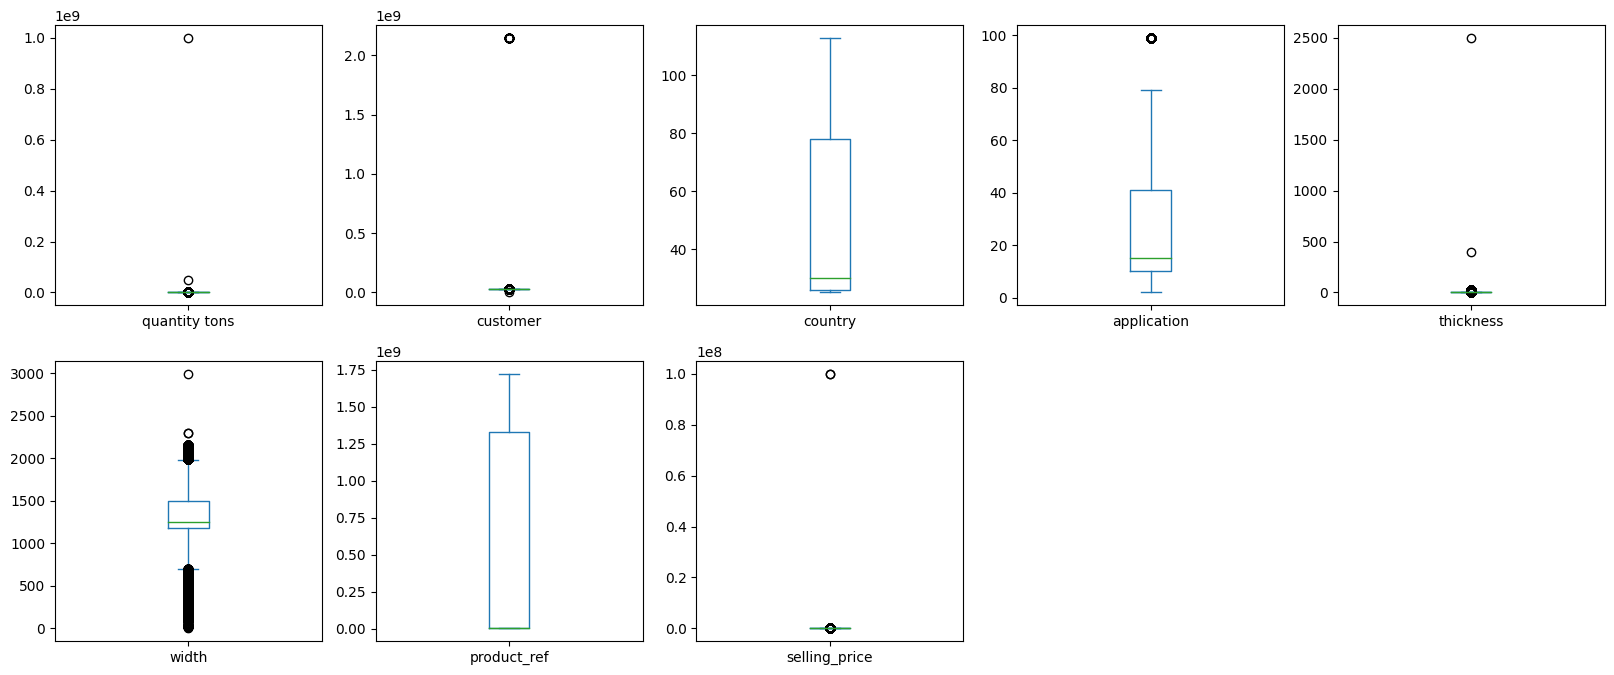

In [15]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

In [16]:
df.skew()

<ipython-input-16-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


quantity tons    424.690816
customer          86.985308
country            0.753090
application        0.724555
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

To find the lower and upper limit with IQR
calculating the Interquartile Range of the data (IQR = Q3 — Q1). Later, will be determine the outlier boundaries with IQR.where Q='table col'.quantile('0.25 and 0.75')
And getting the lower boundary with Q1–1.5 * IQR and getting upper boundary with Q3 + 1.5 * IQR.

In [17]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  print('\n',i,' lower limit=',Q1-1.5 * IQR,' upper limit=',Q3+1.5 * IQR)


 quantity tons  lower limit= -73.31540512358451  upper limit= 151.44757009725032

 thickness  lower limit= -2.75  upper limit= 6.449999999999999

 width  lower limit= 700.0  upper limit= 1980.0

 selling_price  lower limit= 243.0  upper limit= 1379.0


In [18]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.02)
  Q3=df[i].quantile(0.98)
  print('\n',i,' lower limit=',Q1,' upper limit=',Q3)


 quantity tons  lower limit= 1.3687438786867419  upper limit= 702.789880521828

 thickness  lower limit= 0.4  upper limit= 12.0

 width  lower limit= 811.0  upper limit= 2000.0

 selling_price  lower limit= 432.0  upper limit= 1295.0


In [19]:
from scipy.stats.mstats import winsorize

<function matplotlib.pyplot.show(close=None, block=None)>

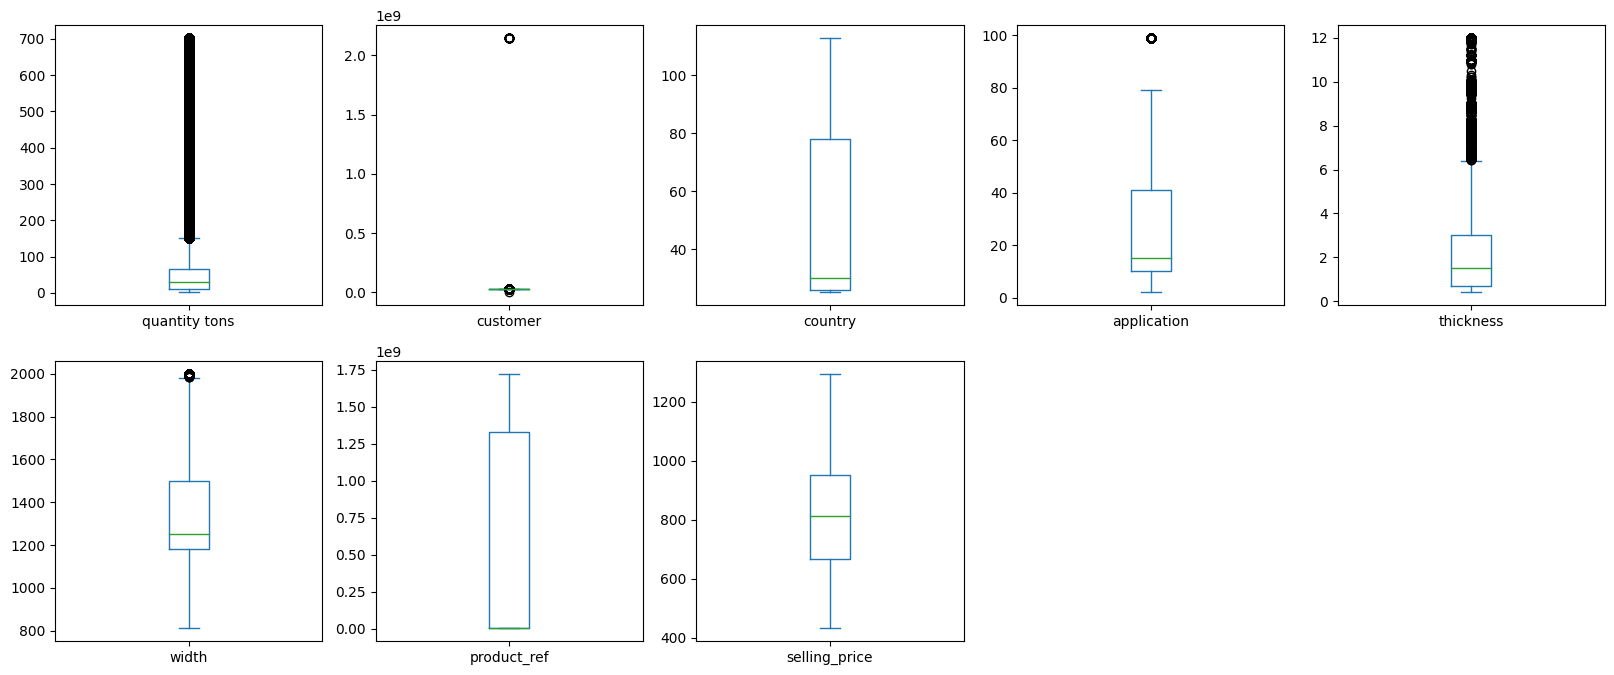

In [20]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  df[i]=winsorize(df[i],(0.02,0.02))
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

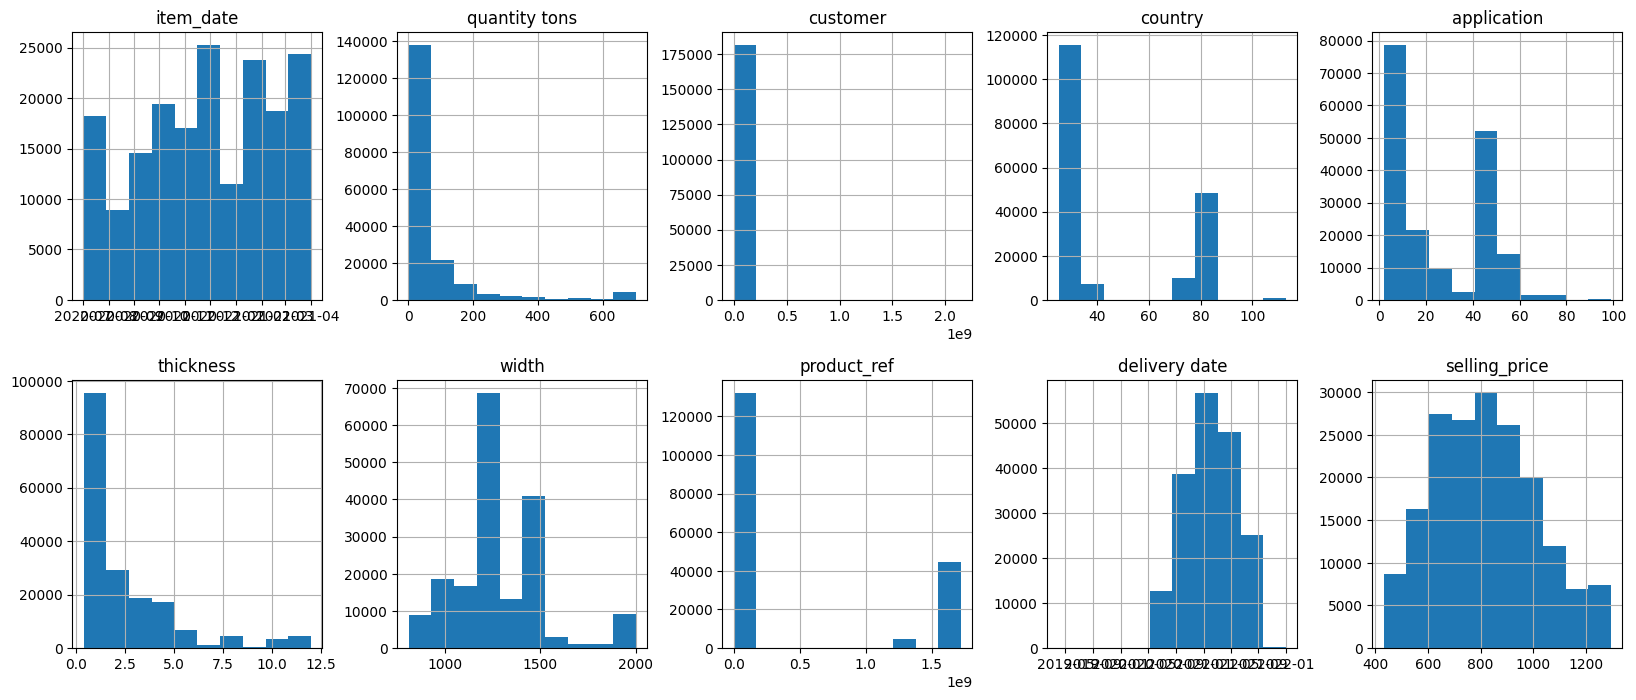

In [21]:
df.hist(layout=(2,5),figsize=(20,8))
plt.show()

In [22]:
df.skew()

<ipython-input-22-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


quantity tons     3.466226
customer         86.985308
country           0.753090
application       0.724555
thickness         1.971541
width             0.824430
product_ref       1.015216
selling_price     0.305634
dtype: float64

In [23]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000
mean,73.461387,3.051221e+07,44.898125,25.613746,2.496851,1299.610025,4.739679e+08,821.179020
std,127.659700,2.433375e+07,24.405794,17.753909,2.585184,248.265048,7.175101e+08,198.321235
min,1.368630,1.245800e+04,25.000000,2.000000,0.400000,811.000000,6.117280e+05,432.000000
25%,10.970711,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000
50%,30.365004,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000
75%,67.161454,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000
max,702.793565,2.147484e+09,113.000000,99.000000,12.000000,2000.000000,1.722208e+09,1295.000000


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
cat_col=['country','status','customer','item type','application','material_ref','product_ref']
le = LabelEncoder()
for i in cat_col:
  print(i)
  print(df[i].unique())
  df[i] = le.fit_transform(df[i])
  print(df[i].unique())

country
[ 28  25  30  32  38  78  27  77 113  79  26  39  40  84  80 107  89]
[ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]
status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
[7 0 6 1 2 8 5 4 3]
customer
[30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]
[ 51 288  39 ... 953 687  97]
item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
[5 6 3 1 2 0 4]
application
[10 41 28 59 15  4 38 56 42 26 27 19 20 66 29 22 40 25 67 79  3 99  2  5
 39 69 70 65 58 68]
[ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]
material_ref
['DEQ1 S460MC' 'DX51D+Z' 'S0380700' ... 'MAS65550' '4.11043_1060X5_BRE'
 '202006170005.IO.1.1']
[5377 5484 9681 ... 8061 2179 1589]
product_ref
[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 16718760

## **Feature Engineering**

## with two date columns order date and delivery date, I'm making a new feature number of days for delivery period.

In [26]:
#ckecking irreleavant date and correcting
#a=df['item_date'].astype(int).unique()
#a.sort()
#a

In [27]:
#a=df['delivery date'].astype(int).unique()
#a.sort()
#a

In [28]:
df['delivery_period']=(df['item_date']-df['delivery date']).abs().dt.days
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.0,1500.0,5377,24,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,702.793565,288,0,7,5,17,0.8,1210.0,5484,22,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,39,4,7,6,12,0.4,952.0,9681,5,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,955,5,7,3,21,2.3,1317.0,5651,22,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,702.793565,397,3,7,5,4,4.0,2000.0,1908,8,2021-03-01,577.00,31


In [29]:
#thickness * width
#df['volume']=df['thickness']*df['width']

# **Checking accuracy with ML MODEls**

## Regression Model

Checking for best accuracy models for selling price prediction.

<ipython-input-30-5606ef6584f0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,2: ].corr())


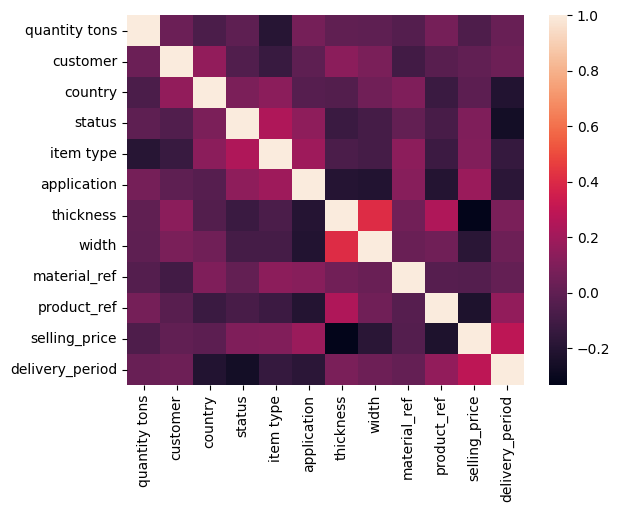

In [30]:
#understanding correlation with feautures and target
plt.figure()
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
x=df[['quantity tons','item type','country','application','thickness','width','material_ref', 'product_ref','delivery_period']].values
y=df[['selling_price']].values
#,'customer'

In [32]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
lis=[LinearRegression(),ElasticNet(),LassoLars()]
models=['LinearRegression','ElasticNet','LassoLars']
score=[]
for i in lis:
  i.fit(X_train, Y_train)
  Y_pred=i.predict(X_test)
  score.append( r2_score(Y_test, Y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

In [ ]:
#KNN
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 5)

model.fit(X_train, Y_train)  #fit the model
Y_pred=model.predict(X_test)

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('KNeighborsRegressor')
score.append(r2_score(Y_test, Y_pred))

In [ ]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=53)
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
importances=model.feature_importances_

for i,v in zip(['quantity tons','customer','item type','country','application','thickness','width','material_ref', 'product_ref','delivery_period'], importances):
  print('Feature:'',Score: ',(i,v))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('DecisionTreeRegressor')
score.append(r2_score(Y_test, Y_pred))

In [ ]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=10, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=4, random_state=53, 
                            verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None).fit(X_train, Y_train)
Y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Mean absolute error: ', mean_absolute_error(Y_test, Y_pred))
print('R2 Score: ', r2_score(Y_test, Y_pred))
models.append('ExtraTreesRegressor')
score.append(r2_score(Y_test, Y_pred))

In [ ]:
models

In [ ]:
score

In [ ]:
plt.barh(models, score,
        height = 0.1, color = "hotpink")
 
plt.xlabel("Score")
plt.ylabel("Models")
plt.title("checking accuracy on models")
plt.show()

## Classification Model

as per problem statement filtering data points other than WON & LOST STATUS values, since STATUS variable with WON being considered as Success and LOST being considered as Failure.

In [ ]:
won_lost=df.loc[df["status"].isin([7,1])]
won_lost.head()

In [ ]:
print(won_lost['status'].unique())
won_lost['status'] = le.fit_transform(won_lost['status'])
print(won_lost['status'].unique())

In [ ]:
#understanding correlation with feautures and target
plt.figure()
sns.heatmap(df.iloc[:,2: ].corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=won_lost[['quantity tons','item type','country','application','thickness','width','material_ref', 'product_ref','selling_price','delivery_period']].values
y=won_lost[['status']].values
#,'customer'

In [ ]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [ ]:
C_Models=[]
Accuracy=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score

In [ ]:
#LogisticRegression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test the LogisticRegression model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('LogisticRegression')
Accuracy.append(accu)
accu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

In [ ]:
#KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

# Test the KNeighborsClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('KNeighborsClassifier')
Accuracy.append(accu)
accu

In [ ]:
#AdaBoostClassifier model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)

# Test the AdaBoostClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('AdaBoostClassifier')
Accuracy.append(accu)
accu

In [ ]:
#Decision Tree model
model = DecisionTreeClassifier(max_depth=18)
model.fit(X_train, Y_train)

# Test the Decision Tree model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('Decision Tree')
Accuracy.append(accu)
accu

In [ ]:
#naive_bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Test the naive_bayes model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('GaussianNB')
Accuracy.append(accu)
accu

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('RandomForestClassifier')
Accuracy.append(accu)
accu

In [ ]:
C_Models

In [ ]:
Accuracy

In [ ]:
plt.barh(C_Models, Accuracy,
        height = 0.1, color = "green")
 
plt.xlabel("Accuracy")
plt.ylabel("C_Models")
plt.title("checking accuracy on models")
plt.show()

# **Streamlit**

In [3]:
%%writefile app.py
import streamlit as st

st.title(':blue[_Copper_]')
st.caption('Industrial Copper Modeling')
tab1, tab2, tab3 = st.tabs(["Price_Prediction", "Order Status" "About"])

with tab1:
  st.subheader(':blue[_Selling_Price_Finder_]')
  st.subheader(':blue[_Enter the Details_]')


with tab1:
  st.subheader(':blue[_Order_Status_Finder_]')
  st.subheader(':blue[_Enter the Details_]')
  with st.form("Details"):
    company_name = st.text_input('Company Name:', value=cmp)
    card_holder_name = st.text_input('Card Holder Name:', value=nam)
    designation = st.text_input('Designation:', value=des)
    mobile_number = st.text_input('Mobile Number:', value=mob)
    email_address = st.text_input('Email Address:', value=email)
    website = st.text_input('Website:', value=url)
    area = st.text_input('Area:', value=area_v)
    city = st.text_input('City:', value=city_v)
    state = st.text_input('State:', value=state_v)
    pincode = st.text_input('Pincode:', value=pin)
    submit_button = st.form_submit_button(label="Show Price")        
#if submit_button:

with tab2:
  st.subheader(':blue[_How to use:_]')
  st.write('1. upload the image from local storage')
  st.write('2. check the details and do corrections if needed')
  st.write('3. finally upload to database by clicking save button')
  st.subheader(':blue[_Packages used:_]')
  st.write('easyocr, streamlit, cv2, regex, sqlalchemy, pymysql')
  st.subheader(':blue[_Demo video:_]')
  st.write('')
  st.subheader(':blue[_GitHub link:_]')
  st.write('https://github.com/kalinharikumar/BizCardX.git')

Writing app.py


In [ ]:
!npm install localtunnel
!pip install streamlit

In [11]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.238.117.143
npx: installed 22 in 2.836s
your url is: https://honest-ghosts-find.loca.lt
